In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression,LogisticRegression,LogisticRegressionCV
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
st_df = pd.read_csv('data/striker.csv')

In [5]:
st_df.head()

,Unnamed: 0,Name,Nationality,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,positions,Category
0,163,Olivier Giroud,France,Arsenal,Sub,12.0,06/26/2012,2020.0,83,192 cm,88 kg,Left,09/30/1986,30,ST,Medium / Medium,3,2,82,72,26,20,37,76,83,84,41,75,78,63,77,56,60,58,79,88,52,59,82,88,84,84,76,70,65,81,82,6,12,11,15,5,ST,3
1,194,Islam Slimani,Algeria,Leicester City,Sub,19.0,08/31/2016,2021.0,82,188 cm,79 kg,Right,06/18/1988,28,ST,High / High,3,2,76,74,34,24,48,88,84,86,54,72,79,58,73,59,69,76,91,85,57,66,87,92,78,81,72,73,47,72,79,15,10,6,9,11,ST,3
2,306,Michy Batshuayi,Belgium,Chelsea,Sub,23.0,07/04/2016,2021.0,80,185 cm,78 kg,Right,10/02/1993,23,ST,Medium / Low,4,3,77,78,16,22,26,59,79,83,23,63,81,65,64,36,81,84,65,82,78,84,81,73,83,83,76,61,46,67,74,7,9,16,10,15,ST,3
3,312,Wissam Ben Yedder,France,Sevilla FC,Sub,12.0,07/30/2016,2021.0,81,170 cm,68 kg,Right,08/12/1990,26,ST,High / High,5,4,83,85,28,26,21,55,80,83,44,76,82,73,77,68,86,84,77,57,86,91,85,74,78,84,69,80,77,74,76,7,6,9,13,7,ST,3
4,313,Lucas Pérez,Spain,Arsenal,Sub,9.0,08/30/2016,2020.0,81,180 cm,73 kg,Left,09/10/1988,28,ST,High / Medium,3,4,82,81,24,26,24,69,81,81,38,76,76,74,77,70,78,78,74,73,75,74,65,68,83,85,82,83,78,79,79,10,14,8,8,10,ST,3


In [7]:
st_lr = st_df.drop(['Unnamed: 0','Work_Rate','Height', 'Weight','Nationality','Club',
                    'Club_Position','Club_Kit', 'Club_Joining', 'Contract_Expiry',
                    'Preffered_Foot','Category','Birth_Date','Preffered_Position',
                    'GK_Positioning','GK_Diving', 'GK_Kicking', 'GK_Handling',
                    'Acceleration','Speed','Reactions','Balance', 'Interceptions',
                    'GK_Reflexes','Standing_Tackle','Marking','positions',
                    'Sliding_Tackle'], axis = 1)

In [8]:
corr = pd.DataFrame(st_lr.corr())

In [9]:
corr.sort_values('Rating', ascending = False, inplace = True)

In [12]:
st_lr.columns

Index(['Name', 'Rating', 'Age', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling', 'Aggression', 'Attacking_Position', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Stamina', 'Strength', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys'], dtype='object')

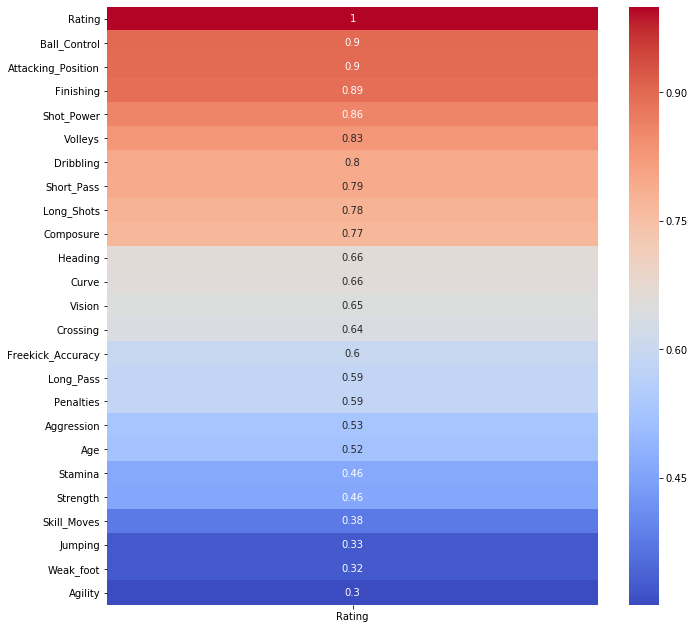

In [13]:
plt.figure(figsize=(11,11))
sns.heatmap(corr[['Rating']],annot = True, cmap='coolwarm');

In [14]:
corr

,Rating,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Aggression,Attacking_Position,Vision,Composure,Crossing,Short_Pass,Long_Pass,Stamina,Strength,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
Rating,1.000000,0.520590,0.323908,0.375203,0.901311,0.797411,0.529323,0.898352,0.649789,0.768764,0.641405,0.793358,0.587579,0.464191,0.458106,0.301479,0.325031,0.662697,0.859485,0.893332,0.776318,0.661227,0.598672,0.585264,0.828656
Ball_Control,0.901311,0.440922,0.321595,0.418618,1.000000,0.837487,0.432778,0.772094,0.648923,0.703310,0.651344,0.775940,0.614976,0.410827,0.314697,0.380047,0.261765,0.487841,0.738833,0.763078,0.706321,0.678145,0.599011,0.502603,0.756036
Attacking_Position,0.898352,0.541866,0.293313,0.265851,0.772094,0.625273,0.493127,1.000000,0.579125,0.732804,0.539956,0.678267,0.484529,0.414369,0.407184,0.212503,0.295834,0.635786,0.724666,0.824812,0.651030,0.563296,0.528243,0.543214,0.753015
Finishing,0.893332,0.434624,0.293638,0.288653,0.763078,0.651566,0.383549,0.824812,0.532427,0.667892,0.486560,0.639872,0.431804,0.334984,0.359008,0.200003,0.270186,0.633463,0.742516,1.000000,0.710785,0.551893,0.495121,0.594131,0.737098
Shot_Power,0.859485,0.488018,0.261608,0.281302,0.738833,0.625745,0.551730,0.724666,0.497254,0.657641,0.526017,0.643806,0.471807,0.360968,0.504863,0.143660,0.248106,0.609817,1.000000,0.742516,0.739740,0.565312,0.539233,0.512618,0.765598
Volleys,0.828656,0.539386,0.304343,0.319033,0.756036,0.658822,0.488380,0.753015,0.564045,0.684489,0.587618,0.668031,0.515898,0.371870,0.338493,0.252080,0.255850,0.560007,0.765598,0.737098,0.711943,0.676335,0.607183,0.526186,1.000000
Dribbling,0.797411,0.332406,0.323492,0.509779,0.837487,1.000000,0.325896,0.625273,0.634179,0.581847,0.672571,0.721676,0.614302,0.391856,0.132311,0.518211,0.229591,0.285247,0.625745,0.651566,0.658271,0.656691,0.553504,0.422079,0.658822
Short_Pass,0.793358,0.424839,0.277985,0.372840,0.775940,0.721676,0.405432,0.678267,0.703572,0.653933,0.705450,1.000000,0.743658,0.368310,0.256478,0.299907,0.231805,0.436900,0.643806,0.639872,0.637320,0.639711,0.567977,0.448928,0.668031
Long_Shots,0.776318,0.445767,0.286309,0.358951,0.706321,0.658271,0.373638,0.651030,0.570296,0.591329,0.580365,0.637320,0.561808,0.320131,0.248785,0.257854,0.186614,0.449025,0.739740,0.710785,1.000000,0.635181,0.625746,0.535924,0.711943
Composure,0.768764,0.531927,0.293758,0.291062,0.703310,0.581847,0.494677,0.732804,0.633175,1.000000,0.540606,0.653933,0.507064,0.376571,0.368362,0.218417,0.275912,0.505462,0.657641,0.667892,0.591329,0.598298,0.523260,0.500085,0.684489


#### Multi-Leaner Regression Modeling 

In [26]:
st_rating_features = ['Ball_Control', 'Attacking_Position','Finishing','Shot_Power',
                      'Penalties','Heading','Dribbling']

In [27]:
X_st_lr = st_df[st_rating_features]

y_st_lr = st_df[['Rating']]

In [28]:
X_st_lr.shape

(2059, 7)

In [29]:
y_st_lr.shape

(2059, 1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_st_lr,
                                                    y_st_lr,
                                                    test_size=0.30, 
                                                    random_state=77)

In [31]:
lr_st = LinearRegression()

lr_st.fit(X_train, y_train)

print(f' CV: {cross_val_score(lr_st, X_train, y_train, cv = 5).mean()}')
print(f' Train: {lr_st.score(X_train, y_train)}')
print(F' Test: {lr_st.score(X_test, y_test)}')

 CV: 0.972437140730398
 Train: 0.9731066696322104
 Test: 0.9758587505963012


#### Classification Modeling

In [32]:
st_df.head()

,Unnamed: 0,Name,Nationality,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,positions,Category
0,163,Olivier Giroud,France,Arsenal,Sub,12.0,06/26/2012,2020.0,83,192 cm,88 kg,Left,09/30/1986,30,ST,Medium / Medium,3,2,82,72,26,20,37,76,83,84,41,75,78,63,77,56,60,58,79,88,52,59,82,88,84,84,76,70,65,81,82,6,12,11,15,5,ST,3
1,194,Islam Slimani,Algeria,Leicester City,Sub,19.0,08/31/2016,2021.0,82,188 cm,79 kg,Right,06/18/1988,28,ST,High / High,3,2,76,74,34,24,48,88,84,86,54,72,79,58,73,59,69,76,91,85,57,66,87,92,78,81,72,73,47,72,79,15,10,6,9,11,ST,3
2,306,Michy Batshuayi,Belgium,Chelsea,Sub,23.0,07/04/2016,2021.0,80,185 cm,78 kg,Right,10/02/1993,23,ST,Medium / Low,4,3,77,78,16,22,26,59,79,83,23,63,81,65,64,36,81,84,65,82,78,84,81,73,83,83,76,61,46,67,74,7,9,16,10,15,ST,3
3,312,Wissam Ben Yedder,France,Sevilla FC,Sub,12.0,07/30/2016,2021.0,81,170 cm,68 kg,Right,08/12/1990,26,ST,High / High,5,4,83,85,28,26,21,55,80,83,44,76,82,73,77,68,86,84,77,57,86,91,85,74,78,84,69,80,77,74,76,7,6,9,13,7,ST,3
4,313,Lucas Pérez,Spain,Arsenal,Sub,9.0,08/30/2016,2020.0,81,180 cm,73 kg,Left,09/10/1988,28,ST,High / Medium,3,4,82,81,24,26,24,69,81,81,38,76,76,74,77,70,78,78,74,73,75,74,65,68,83,85,82,83,78,79,79,10,14,8,8,10,ST,3


In [33]:
st_df['Category'].value_counts()

1    716
2    555
3    540
0    233
4     15
Name: Category, dtype: int64